# R的默认绘图是一场噩梦

In [1]:
decomp <- function(X,group){
    # X is (p,n) matrix, group is n dimention vector
    Xbar <- NULL
    for(g in unique(group)){
        index <- group == g
        ni <- sum(index)
        #Xbari <- mean(X[,index],1)
        Xbari <- apply(X[,index],1,mean)
        Xbar <- cbind(Xbar, matrix(rep(Xbari,ni),nrow(X)))
    }
    #Xbarbar <- matrix(rep(mean(X,1),ncol(X)),nrow(X))
    Xbarbar <- matrix(rep(apply(X,1,mean),ncol(X)),nrow(X))
    B <- (Xbar - Xbarbar) %*% t(Xbar - Xbarbar)
    E <- (X - Xbar) %*% t(X - Xbar)
    W <- (X - Xbarbar) %*% t(X - Xbarbar)
    return(list(B = B, E = E, W = W))
}


head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
X <- t(as.matrix(iris[,-ncol(iris)]))
X

Sepal.Length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
Sepal.Width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
Petal.Length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
Petal.Width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [3]:
group <- iris$Species
group

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [4]:
d <- decomp(X,group)
d

$B
          [,1]      [,2]     [,3]      [,4]
[1,]  63.21213 -19.95267 165.2484  71.27933
[2,] -19.95267  11.34493 -57.2396 -22.93267
[3,] 165.24840 -57.23960 437.1028 186.77400
[4,]  71.27933 -22.93267 186.7740  80.41333

$E
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length      38.9562     13.6300      24.6246      5.6450
Sepal.Width       13.6300     16.9620       8.1208      4.8084
Petal.Length      24.6246      8.1208      27.2226      6.2718
Petal.Width        5.6450      4.8084       6.2718      6.1566

$W
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   102.168333   -6.322667     189.8730    76.92433
Sepal.Width     -6.322667   28.306933     -49.1188   -18.12427
Petal.Length   189.873000  -49.118800     464.3254   193.04580
Petal.Width     76.924333  -18.124267     193.0458    86.56993

In [5]:
M <- solve(d$E) %*% d$B
M

Sepal.Length,-3.058369,1.081383,-8.111923,-3.458650
Sepal.Width,-5.561639,2.178219,-14.964612,-6.307740
Petal.Length,8.077439,-2.942719,21.511591,9.142065
Petal.Width,10.497082,-3.419854,27.548525,11.845880


In [6]:
res <- eigen(M)
res

-0.2087418,-0.006531964,0.2897570,-0.8827874
-0.3862037,-0.586610553,-0.4133779,0.2656505
0.5540117,0.252561540,-0.4723986,0.2378342
0.7073504,-0.769453092,0.7224951,0.3058612


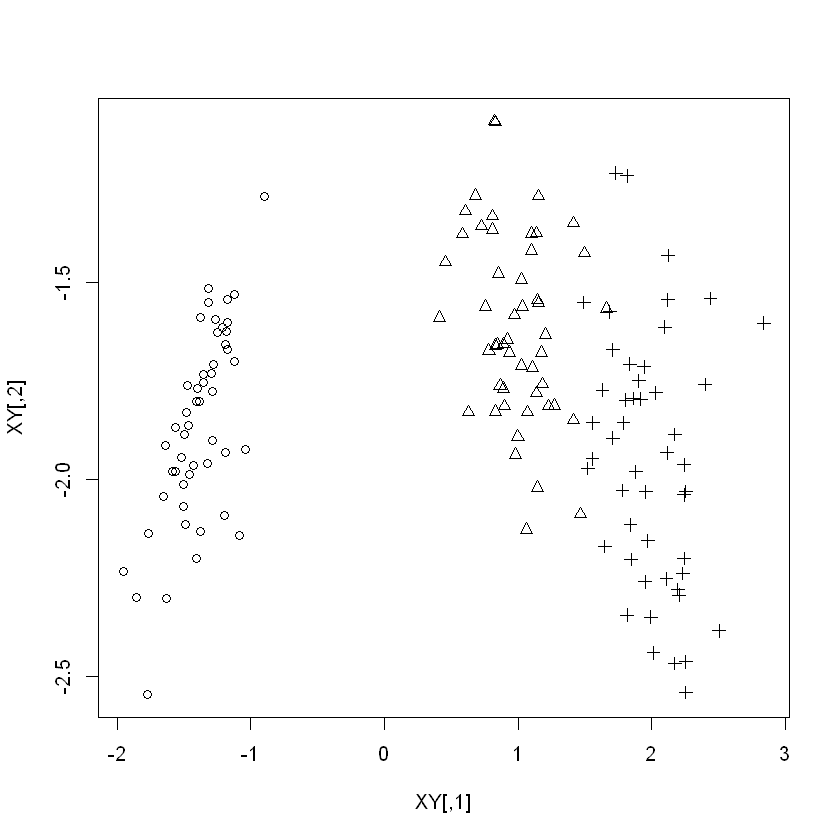

In [7]:
XY <- t(t(res$vectors[,c(1,2)]) %*% X)

plot(XY,cex=0) # silly R setting
points(XY[group == unique(group)[1],],pch=1)
points(XY[group == unique(group)[2],],pch=2)
points(XY[group == unique(group)[3],],pch=3)

这个秘制`cex=0`的技巧。这个中科院画风，想像xlim那样换坐标范围，见鬼吧你。

In [8]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

In [9]:
df <- data.frame(XY)
df$group <- group
head(df)

X1,X2,group
-1.499210,-1.886754,setosa
-1.264360,-1.592143,setosa
-1.355253,-1.733415,setosa
-1.184956,-1.623588,setosa
-1.516956,-1.944762,setosa
-1.408640,-2.201480,setosa


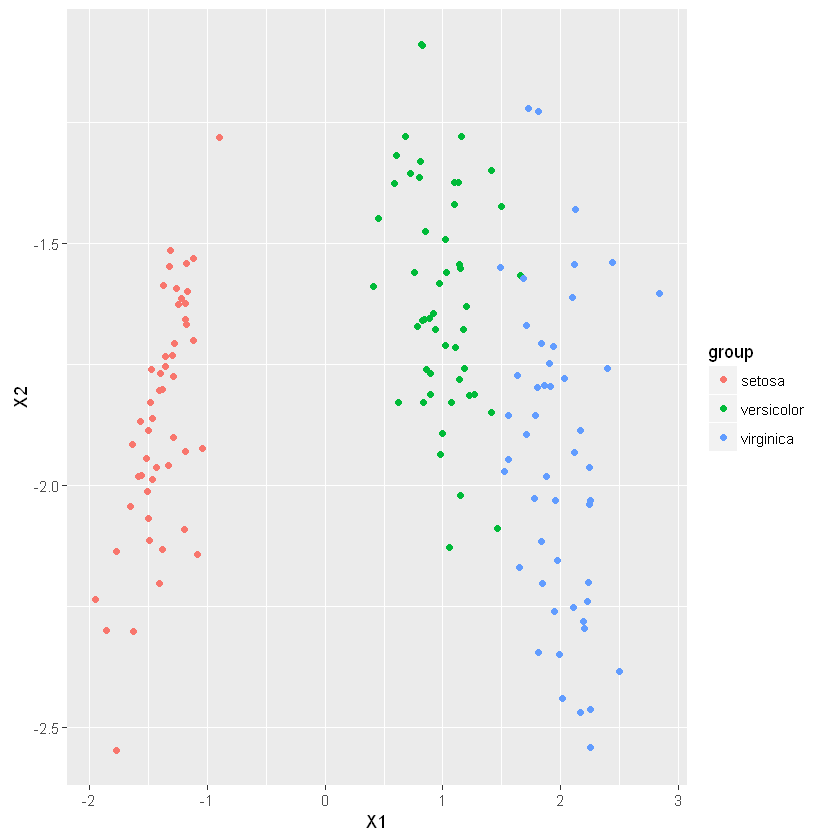

In [19]:
ggplot(df, aes(X1, X2, colour = group)) + geom_point() 

除了一般要构造`data.frame`麻烦点，不知道比默认绘图高到哪里去。一个`aes`里把颜色属性对应到`group`属性上的描述，胜过千言万语。

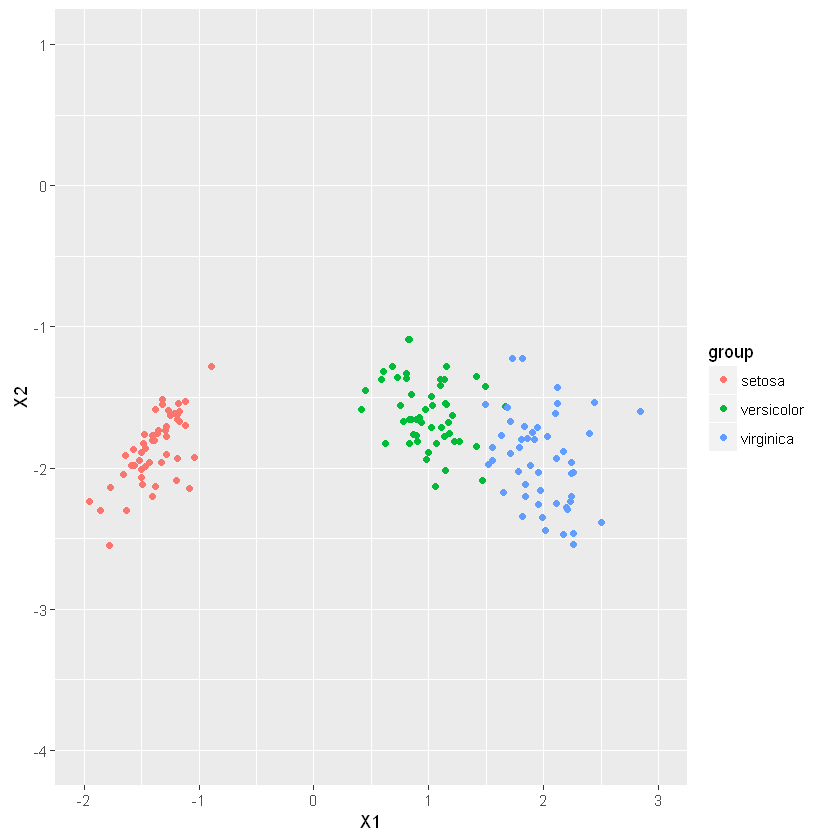

In [18]:
ggplot(df, aes(X1, X2, colour = group)) + geom_point() + lims(x = c(-2, 3), y = c(-4, 1))

In [ ]:
1